/home/dotin13/mijo/GitHub/hand-syn/tang-syn/venv/lib/python3.11/site-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



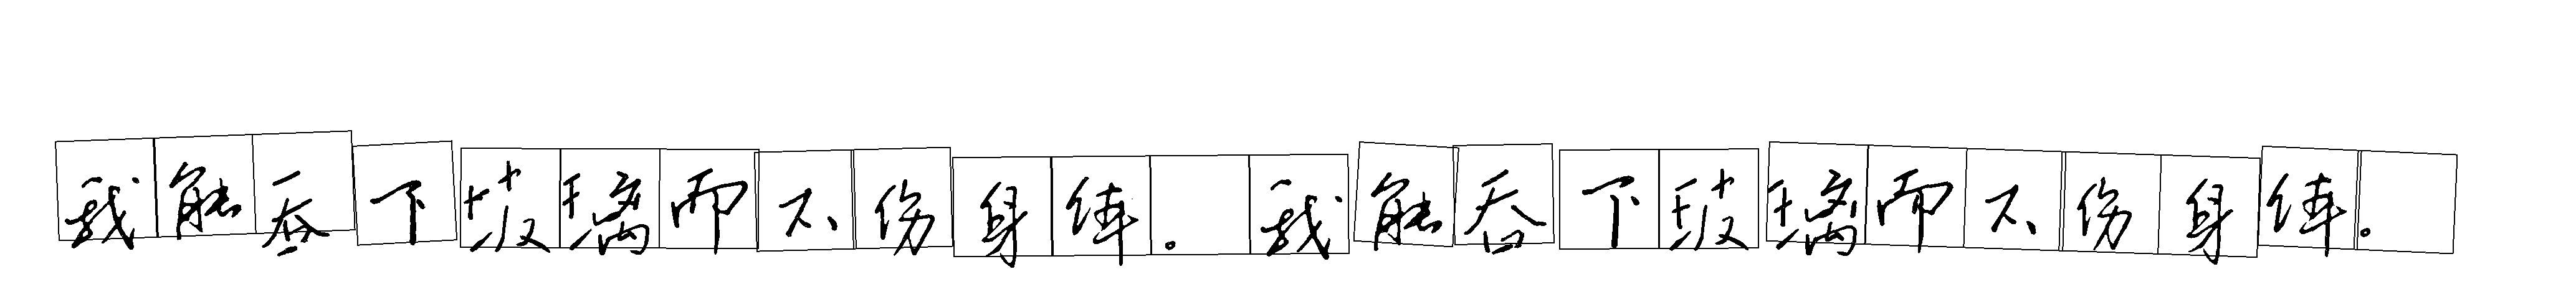
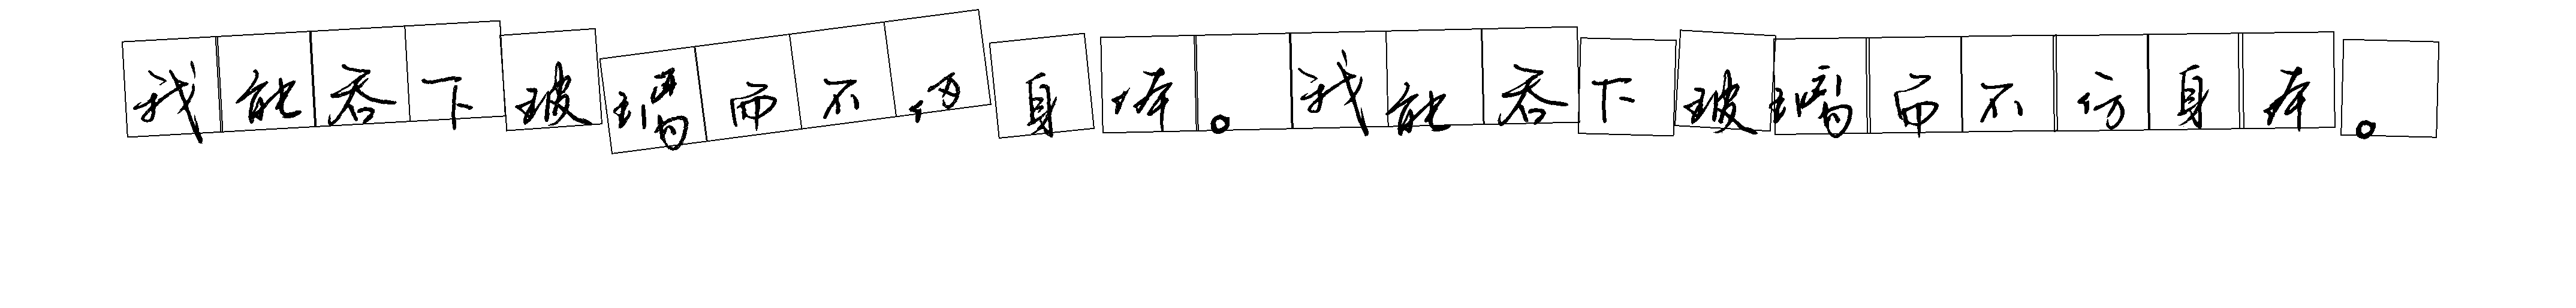
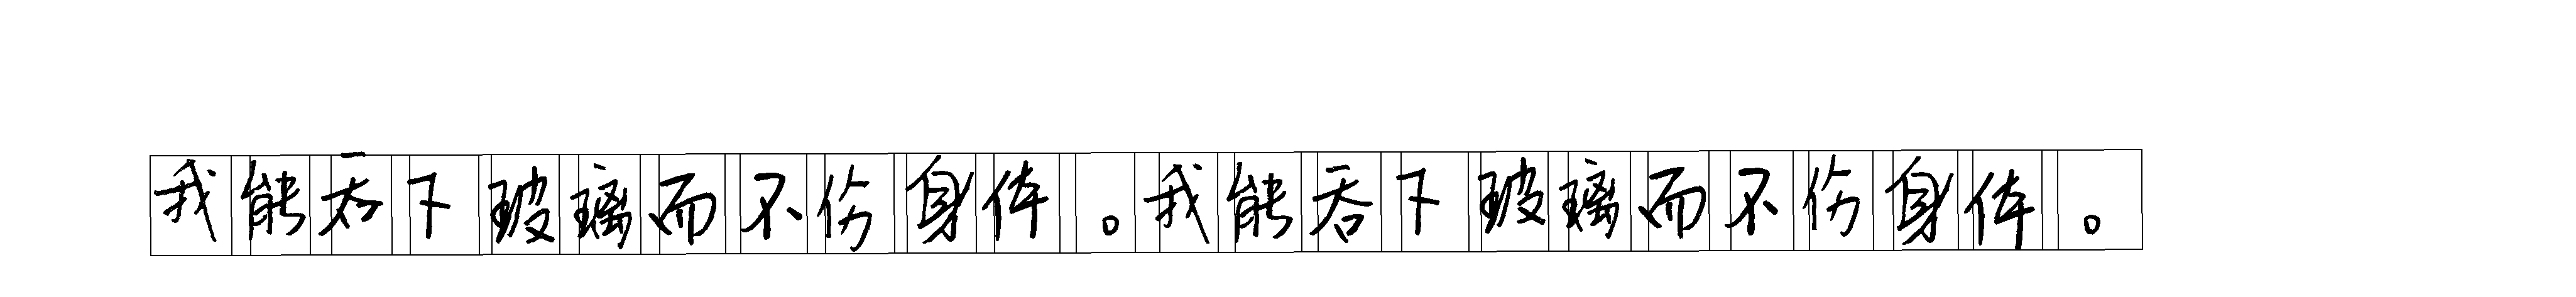
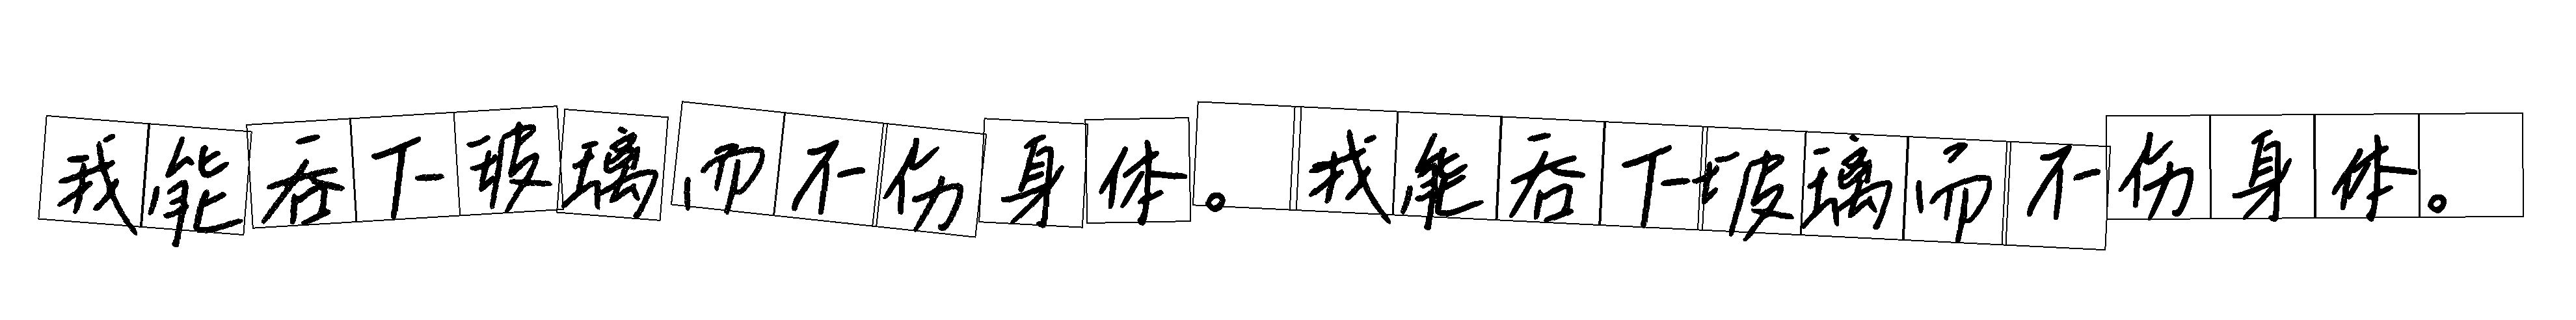
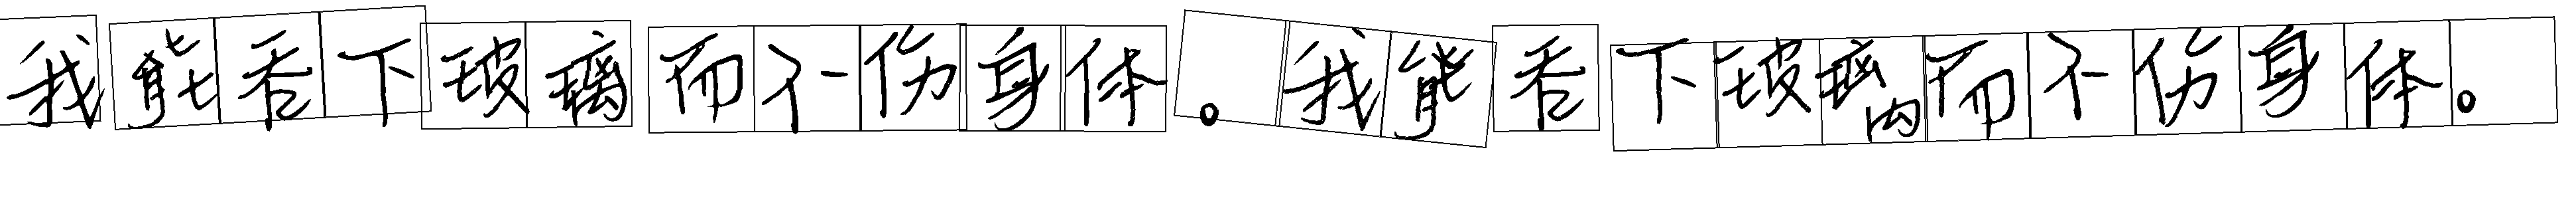


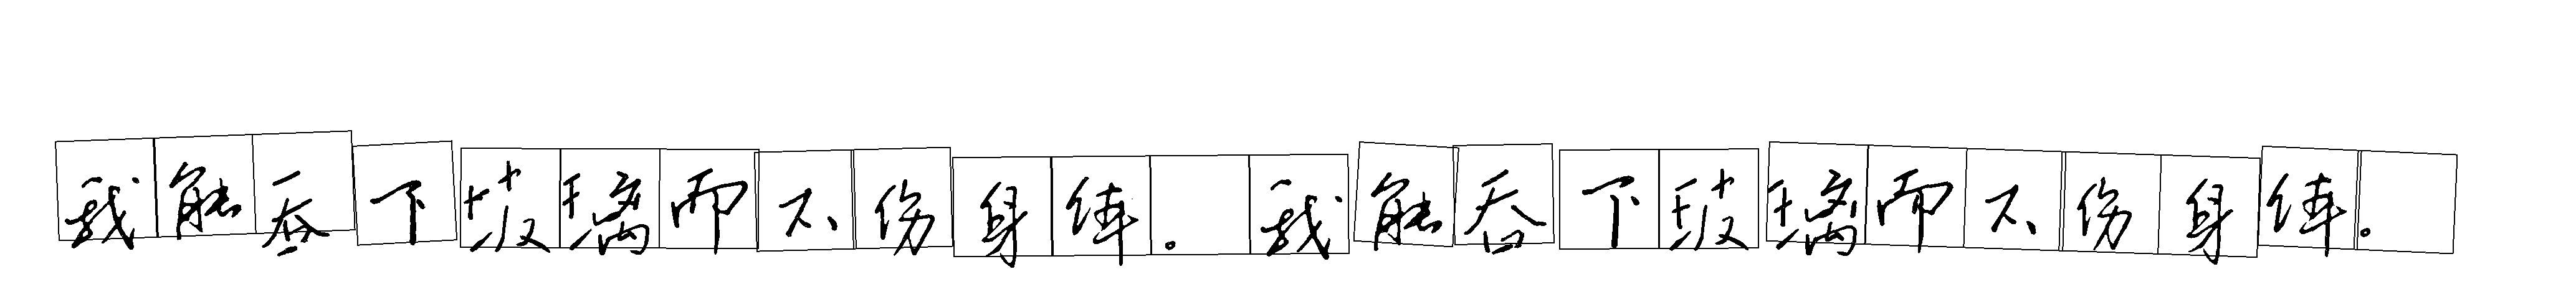
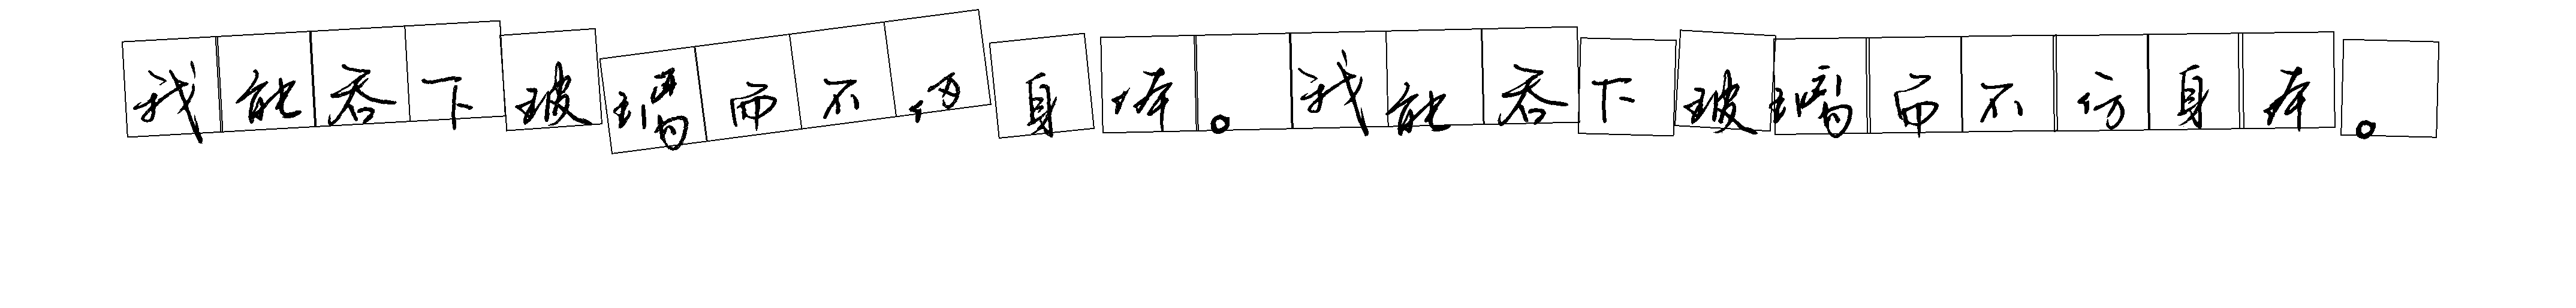
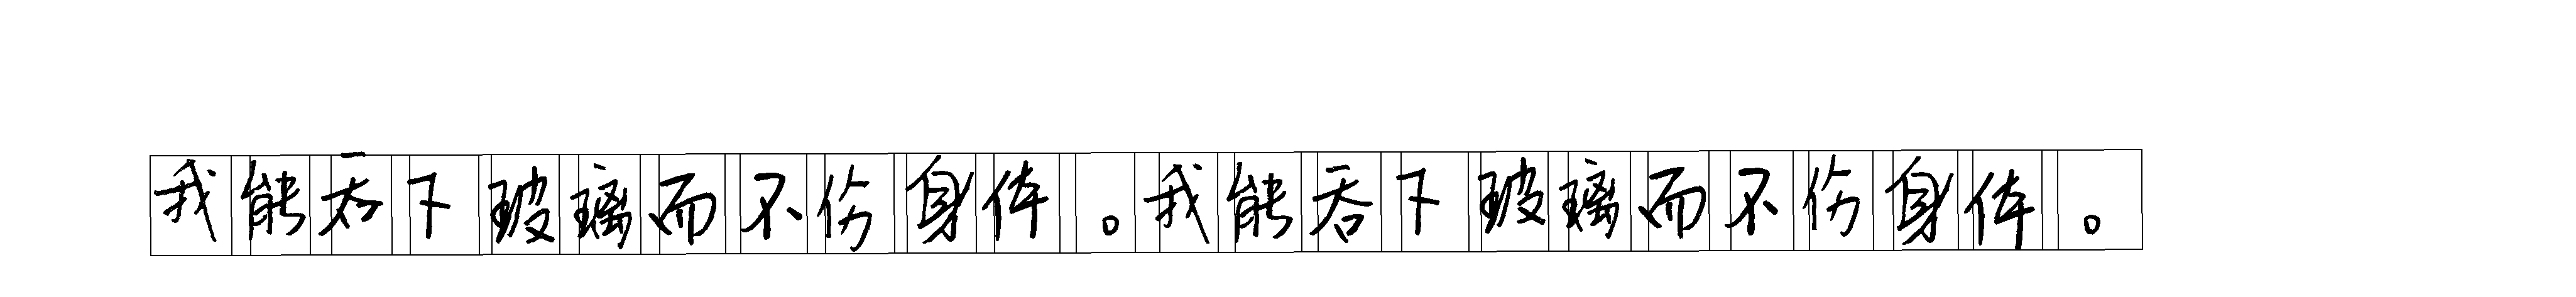
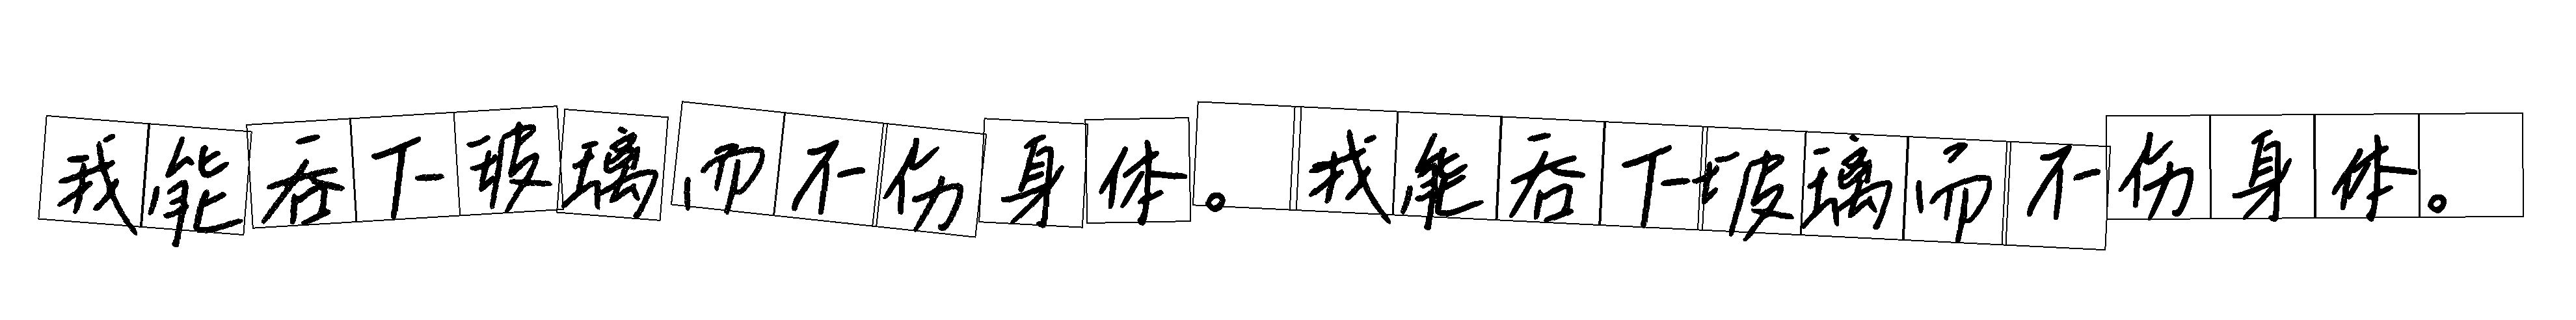
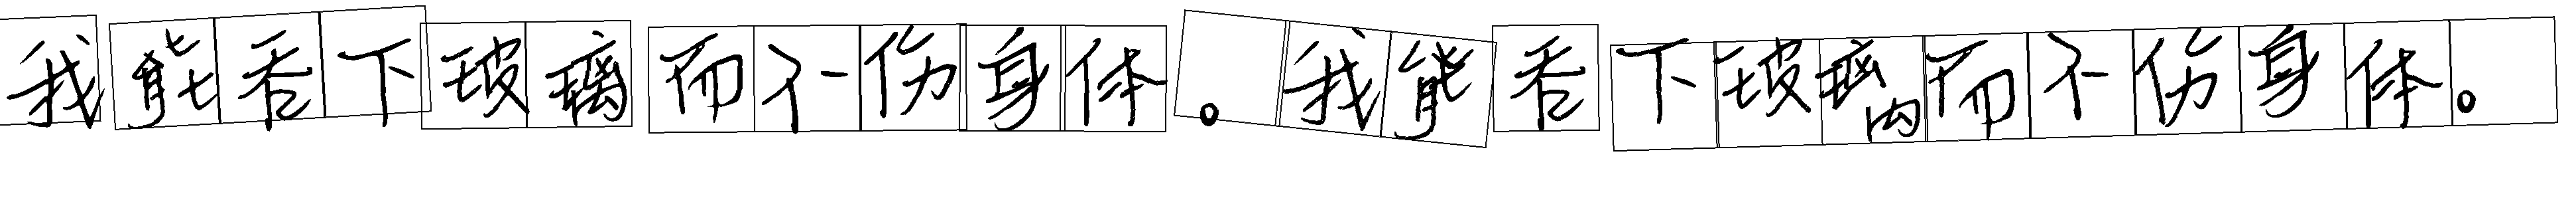

In [3]:
import os
import random

import ipyplot
from PIL import Image, ImageFont
from handright import Template, handwrite

text = "我能吞下玻璃而不伤身体。我能吞下玻璃而不伤身体。"
result = []
for font_file in os.listdir("fonts"):
    template = Template(
        background=Image.new(mode="1", size=(200, 200), color=1),
        font=ImageFont.truetype(f"fonts/{font_file}", size=160),
        fill=0,
        left_margin=random.randint(0, 300),
        top_margin=random.randint(0, 300),
        right_margin=random.randint(0, 300),
        bottom_margin=random.randint(0, 300),
        line_spacing_sigma=4,  # 行间距随机扰动
        font_size_sigma=2,  # 字体大小随机扰动
        word_spacing_sigma=4,  # 字间距随机扰动
        start_chars="“（[<",  # 特定字符提前换行，防止出现在行尾
        end_chars="，。",  # 防止特定字符因排版算法的自动换行而出现在行首
        perturb_x_sigma=8,  # 笔画横向偏移随机扰动
        perturb_y_sigma=8,  # 笔画纵向偏移随机扰动
        perturb_theta_sigma=0.05,  # 笔画旋转偏移随机扰动
        single_line=True,
        graph_paper=True,
        features=set([]))
    images = handwrite(text, template)
    for i, im in enumerate(images):
        result.append(im)

ipyplot.plot_images(result, img_width=1000)